# 2D Finite Difference Method for LFP and NMC Batteries


## LFP Battery

The Python script simulates heat transfer in a 2D LFP and NMC batteries model that is currently used in a joy boat with a 2kw power capacity. Sizes considered according to real sizes of battery. Heat flux values estimated for simulating heat flux generated by battery cells. 

Please wait for a moment


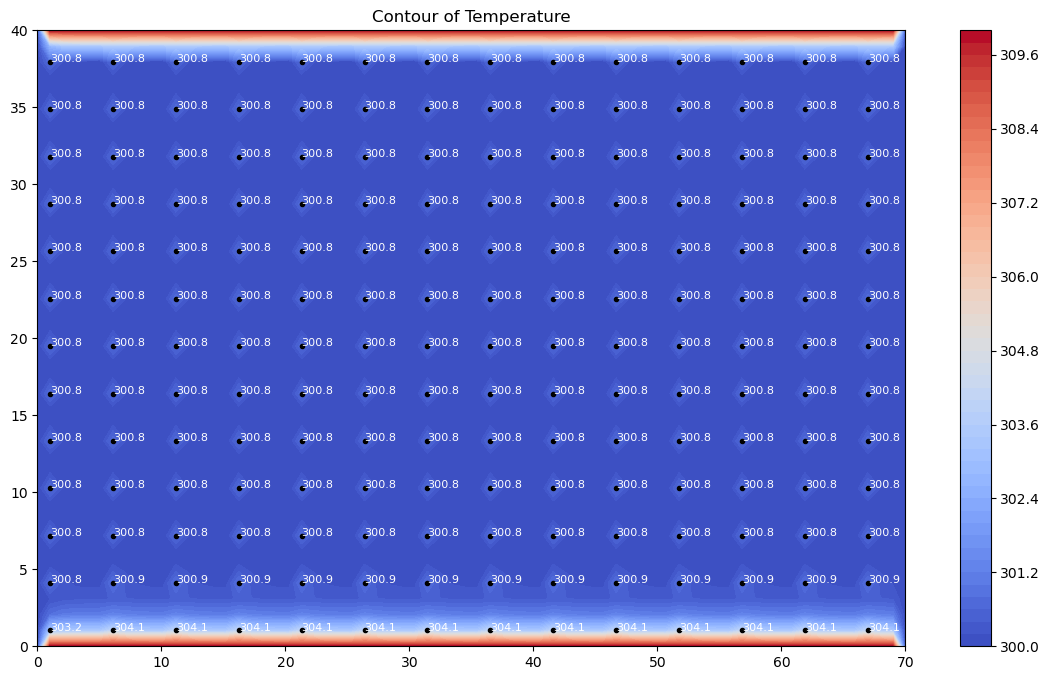

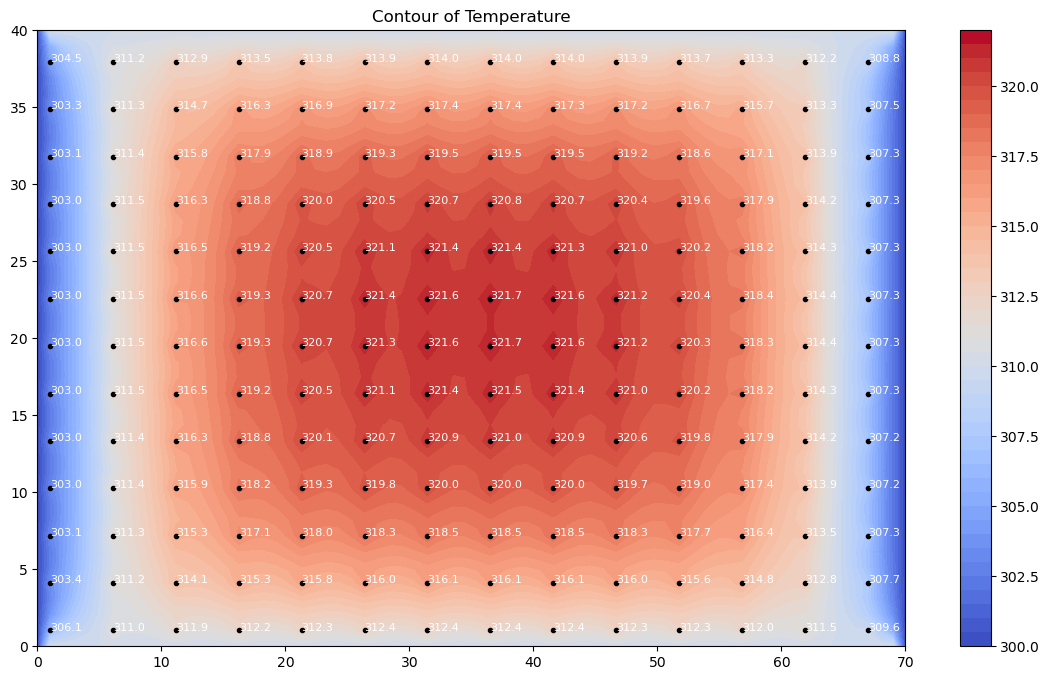

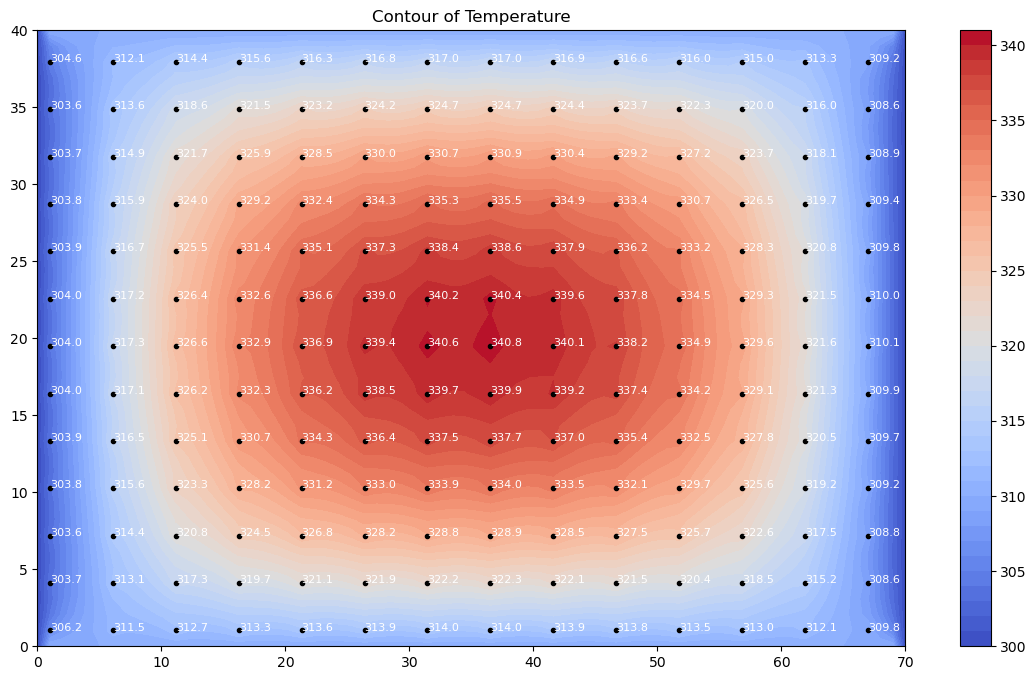

Iteration finished


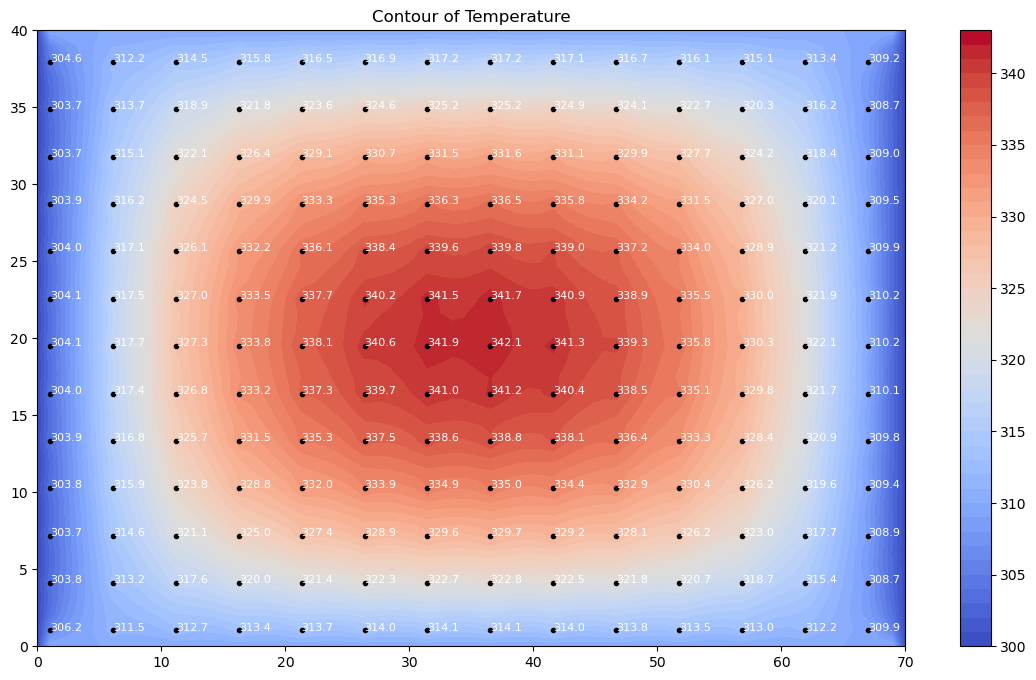

In [46]:
import numpy as np
import matplotlib.pyplot as plt

plate_x = 70 # Length of battery (cm)
plate_y = 40 # Width of battery (cm)
max_iter_time = 1200 #End number of iteration loop
delta = 1 #Change period of iteration loop

# For plotting
n1, n2 = (70, 40)
dimX = np.linspace(0, 70, n1)
dimY = np.linspace(0, 40, n2)
X, Y = np.meshgrid(dimX, dimY, indexing='ij')

# Creating grid of geometry for calculation
T = np.empty((plate_x, plate_y))
Dx = 1
Dy = 1
k = 2  # Thermal conductivity of battery cells
h_top = 10  # Heat transfer coefficient at the top wall (air)
h_bottom = 10  # Heat transfer coefficient at the bottom wall (air)

# Defining temperature values for battery
T_top = 310.0
T_left = 300.0
T_bottom = 310.0
T_right = 300.0
T_inner = 300.0

# Assigning temperature values to grid points
T[1:-1,1:-1] = T_inner
T[:, -1] = T_top
T[:, 0] = T_bottom
T[0, :] = T_left
T[-1, :] = T_right

# Adding heat flux that battery cells generate
hs_x = []
hs_y = []
heat_flux = 1.5

for i in range(1, plate_x, 5):
    hs_x.append(i)

for j in range(1, plate_y, 3):
    hs_y.append(j)

# Arranging plot constrast and type
colorinterpolation = 50
colourMap = plt.cm.coolwarm

# Creating a list for simulate iteration steps
simulate = [0, 200, 800]

# The conduction and convection are arranged according to the battery mounted on its left 
# and right walls, free convection only exists on the top and bottom walls of the battery.

print("Please wait for a moment")
for iteration in range(0, max_iter_time):
    for i in range(1, plate_x - 1, delta):
        for j in range(1, plate_y - 1, delta):
            # For inner nodes
            T[i, j] = 0.25 * (T[i + 1][j] + T[i - 1][j] + T[i][j + 1] + T[i][j - 1])  

            if i == 0:  # Left wall (conduction only)
                T[i, j] = (k * ((Dy / Dx) * T[i + 1, j] + (Dx / Dy) * (T[i, j - 1] 
                + T[i, j + 1]))) / ((2 * k * (Dy / Dx)) + 2 * k * (Dx / Dy))
                
            elif i == plate_x - 1:  # Right wall (conduction only)
                T[i, j] = (k * ((Dy / Dx) * T[i - 1, j] + (Dx / Dy) * (T[i, j - 1] 
                + T[i, j + 1]))) / ((2 * k * (Dy / Dx)) + 2 * k * (Dx / Dy))

            if j == 0:  # Bottom wall (conduction only)
                T[i, j] = (k * ((Dy / Dx) * T[i, j + 1] + (Dx / Dy) * T[i + 1, j])) / (
                        (k * (Dy / Dx)) + (k * (Dx / Dy)))
                
            elif j == plate_y - 1:  # Top wall (conduction and convection)
                T[i, j] = ((k * (Dy / Dx) * T[i, j - 1]) + (h_top * Dx * T_top)) /
                ((k * (Dy / Dx)) + (h_top * Dx))

            if i == 0 and j == 0:  # Bottom-left corner (conduction only)
                T[i, j] = (k * ((Dy / Dx) * T[i + 1, j] + (Dx / Dy) * T[i, j + 1])) / (
                        (k * (Dy / Dx)) + (k * (Dx / Dy)))

            if i == plate_x - 1 and j == 0:  # Bottom-right corner (conduction only)
                T[i, j] = (k * ((Dy / Dx) * T[i - 1, j] + (Dx / Dy) * T[i, j + 1])) / (
                        (k * (Dy / Dx)) + (k * (Dx / Dy)))

            if i == 0 and j == plate_y - 1:  # Top-left corner (conduction and convection)
                T[i, j] = ((k * (Dy / Dx) * T[i + 1, j]) + (h_top * Dx * T_top)) /
                ((k * (Dy / Dx)) + (h_top * Dx))

            if i == plate_x - 1 and j == plate_y - 1:  # Top-right corner (conduction only)
                T[i, j] = (k * ((Dy / Dx) * T[i - 1, j] + (Dx / Dy) * T[i, j - 1])) / (
                        (k * (Dy / Dx)) + (k * (Dx / Dy)))

            if i in hs_x and j in hs_y:
                T[i, j] += (heat_flux * Dx) / (k * Dy)
    
    for sim in simulate:
        if iteration == sim:
            # Configure the contour
            # Configure the figure size
            figure_size = (14, 8)
            plt.figure(figsize=figure_size)
            plt.title("Contour of Temperature")
            plt.contourf(X, Y, T, colorinterpolation, cmap=colourMap)
            plt.colorbar() # Set Colorbar

            for i in hs_x: # Plot '.' for each heat flux location and add temperature values
                for j in hs_y:
                    plt.plot(dimX[i], dimY[j], '.', color='black')
                    plt.text(dimX[i], dimY[j], f'{T[i, j]:.1f}', color='white', fontsize=8)

            plt.savefig('heat.png')
            # Show the result in the plot window
            plt.show()
            
            
print("Iteration finished")

# Configure the contour
# Configure the figure size
figure_size = (14, 8)
plt.figure(figsize=figure_size)
plt.title("Contour of Temperature")
plt.contourf(X, Y, T, colorinterpolation, cmap=colourMap)
plt.colorbar() # Set Colorbar

for i in hs_x: # Plot '.' for each heat flux location and add temperature values
    for j in hs_y:
        plt.plot(dimX[i], dimY[j], '.', color='black')
        plt.text(dimX[i], dimY[j], f'{T[i, j]:.1f}', color='white', fontsize=8)

plt.savefig('heat.png')
# Show the result in the plot window
plt.show()


## NMC Battery

The Python script simulates heat transfer in a 2D NMC battery model that could be used in a joy boat with a 2kw power capacity. Sizes considered according to NMC battery. Heat flux values estimated for simulating heat flux generated by battery cells. 

Please wait for a moment


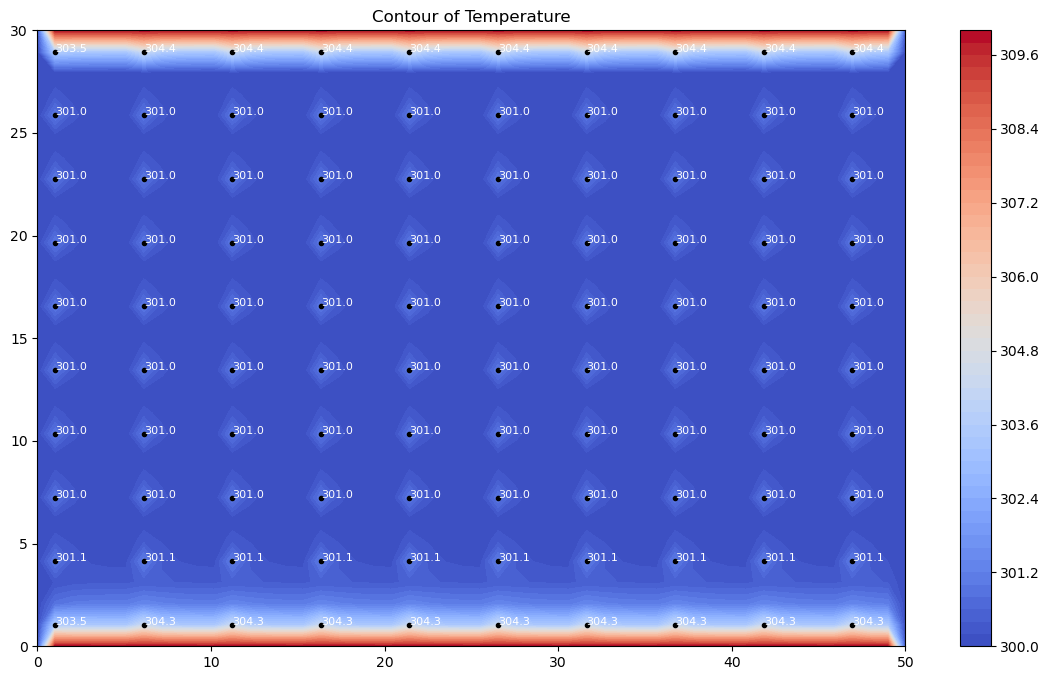

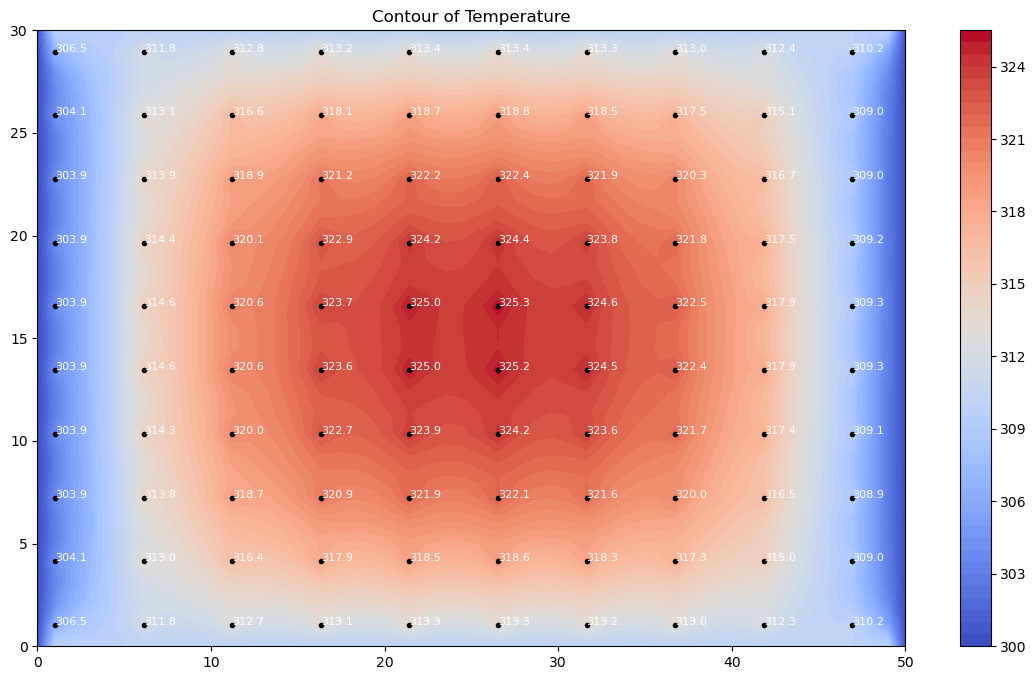

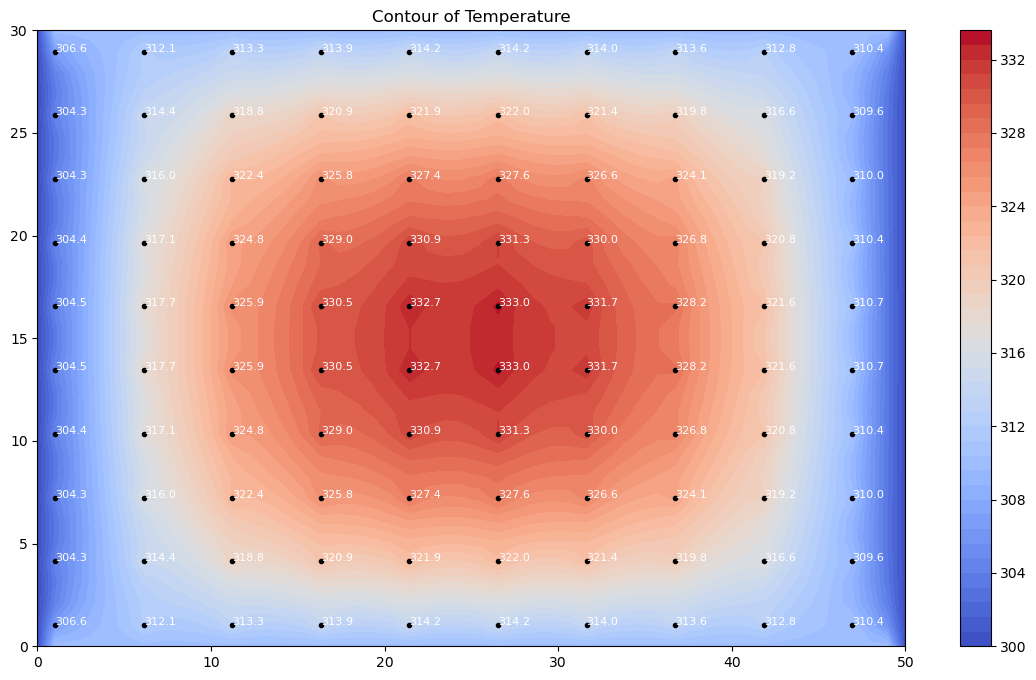

Iteration finished


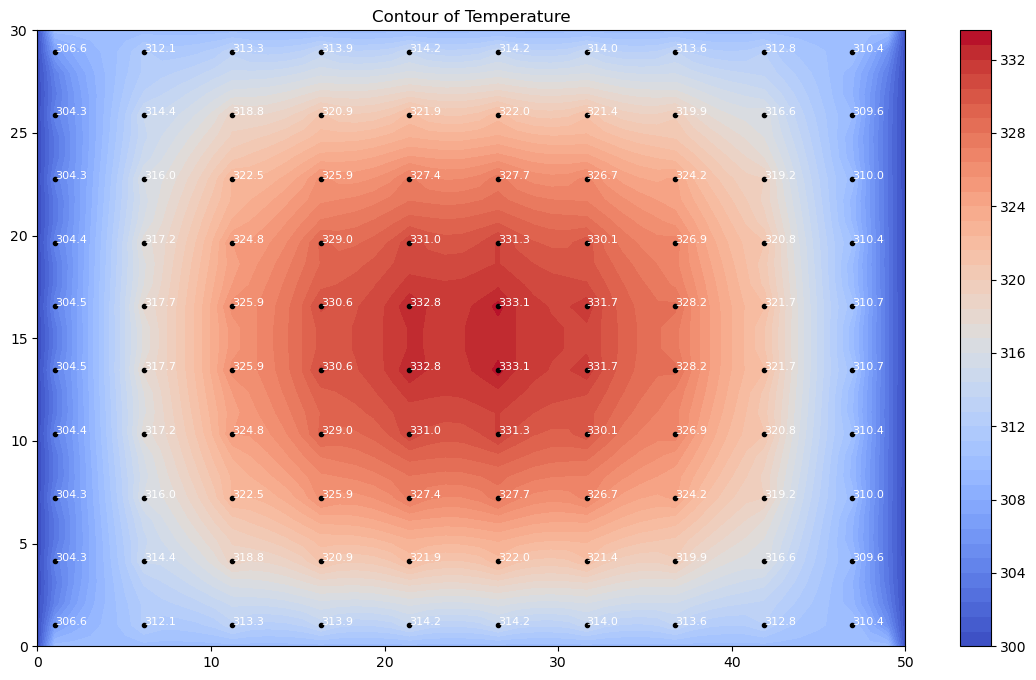

In [39]:
#NMC Battery

import numpy as np
import matplotlib.pyplot as plt

plate_x = 50 # Length of battery (cm)
plate_y = 30 # Width of battery (cm)
max_iter_time = 1200
delta = 1

# For plotting
n1, n2 = (50, 30)
dimX = np.linspace(0, 50, n1)
dimY = np.linspace(0, 30, n2)
X, Y = np.meshgrid(dimX, dimY, indexing='ij')

# Creating grid of geometry for calculation
T = np.empty((plate_x, plate_y))
Dx = 1
Dy = 1
k = 3  # Thermal conductivity of battery cells
h_top = 10  # Heat transfer coefficient at the top wall (air)
h_bottom = 10  # Heat transfer coefficient at the bottom wall (air)

# Defining temperature values for battery
T_top = 310.0
T_left = 300.0
T_bottom = 310.0
T_right = 300.0
T_inner = 300.0

# Assigning temperature values to grid points
T[1:-1,1:-1] = T_inner
T[:, -1] = T_top
T[:, 0] = T_bottom
T[0, :] = T_left
T[-1, :] = T_right

# Adding heat flux that battery cells generate
hs_x = []
hs_y = []
heat_flux = 3

for i in range(1, plate_x, 5):
    hs_x.append(i)

for j in range(1, plate_y, 3):
    hs_y.append(j)
    
# Arranging plot constrast and type
colorinterpolation = 50
colourMap = plt.cm.coolwarm

# Creating a list for simulate iteration steps
simulate = [0, 200, 800]

# The conduction and convection are arranged according to the battery mounted on its left
# and right walls, free convection only exists on the top and bottom walls of the battery.

print("Please wait for a moment")
for iteration in range(0, max_iter_time):
    for i in range(1, plate_x - 1, delta):
        for j in range(1, plate_y - 1, delta):
            # For inner nodes
            T[i, j] = 0.25 * (T[i + 1][j] + T[i - 1][j] + T[i][j + 1] + T[i][j - 1])  

            if i == 0:  # Left wall (conduction only)
                T[i, j] = (k * ((Dy / Dx) * T[i + 1, j] + (Dx / Dy) * (T[i, j - 1] +
                T[i, j + 1]))) / ((2 * k * (Dy / Dx)) + 2 * k * (Dx / Dy))
                
            elif i == plate_x - 1:  # Right wall (conduction only)
                T[i, j] = (k * ((Dy / Dx) * T[i - 1, j] + (Dx / Dy) * (T[i, j - 1] +
                T[i, j + 1])))  / ( (2 * k * (Dy / Dx)) + 2 * k * (Dx / Dy))

            if j == 0:  # Bottom wall (conduction only)
                T[i, j] = (k * ((Dy / Dx) * T[i, j + 1] + (Dx / Dy) * T[i + 1, j])) / (
                        (k * (Dy / Dx)) + (k * (Dx / Dy)))
            elif j == plate_y - 1:  # Top wall (conduction and convection)
                T[i, j] = ((k * (Dy / Dx) * T[i, j - 1]) + (h_top * Dx * T_top)) / 
                ((k * (Dy / Dx)) + (h_top * Dx))

            if i == 0 and j == 0:  # Bottom-left corner (conduction only)
                T[i, j] = (k * ((Dy / Dx) * T[i + 1, j] + (Dx / Dy) * T[i, j + 1])) / (
                        (k * (Dy / Dx)) + (k * (Dx / Dy)))

            if i == plate_x - 1 and j == 0:  # Bottom-right corner (conduction only)
                T[i, j] = (k * ((Dy / Dx) * T[i - 1, j] + (Dx / Dy) * T[i, j + 1])) / (
                        (k * (Dy / Dx)) + (k * (Dx / Dy)))

            if i == 0 and j == plate_y - 1:  # Top-left corner (conduction and convection)
                T[i, j] = ((k * (Dy / Dx) * T[i + 1, j]) + (h_top * Dx * T_top)) / 
                ((k * (Dy / Dx)) + (h_top * Dx))

            if i == plate_x - 1 and j == plate_y - 1:  # Top-right corner (conduction only)
                T[i, j] = (k * ((Dy / Dx) * T[i - 1, j] + (Dx / Dy) * T[i, j - 1])) / (
                        (k * (Dy / Dx)) + (k * (Dx / Dy)))

            if i in hs_x and j in hs_y:
                T[i, j] += (heat_flux * Dx) / (k * Dy)
    
    for sim in simulate:
        if iteration == sim:
            # Configure the contour
            # Configure the figure size
            figure_size = (14, 8)
            plt.figure(figsize=figure_size)
            plt.title("Contour of Temperature")
            plt.contourf(X, Y, T, colorinterpolation, cmap=colourMap)
            plt.colorbar() # Set Colorbar

            for i in hs_x: # Plot '.' for each heat flux location and add temperature values
                for j in hs_y:
                    plt.plot(dimX[i], dimY[j], '.', color='black')
                    plt.text(dimX[i], dimY[j], f'{T[i, j]:.1f}', color='white', fontsize=8)

            plt.savefig('heat.png')
            # Show the result in the plot window
            plt.show()
            
            
print("Iteration finished")

# Configure the contour
# Configure the figure size
figure_size = (14, 8)
plt.figure(figsize=figure_size)
plt.title("Contour of Temperature")
plt.contourf(X, Y, T, colorinterpolation, cmap=colourMap)
plt.colorbar() # Set Colorbar

for i in hs_x: # Plot '.' for each heat flux location and add temperature values
    for j in hs_y:
        plt.plot(dimX[i], dimY[j], '.', color='black')
        plt.text(dimX[i], dimY[j], f'{T[i, j]:.1f}', color='white', fontsize=8)

plt.savefig('heat.png')
# Show the result in the plot window
plt.show()


## LFP Battery Simulation

In [5]:
# LFP Battery

import numpy as np
import matplotlib.pyplot as plt
import imageio
import os
import warnings

plate_x = 70 # Length of battery (cm)
plate_y = 40 # Width of battery (cm)
max_iter_time = 1200
delta = 1

# For plotting
n1, n2 = (70, 40)
dimX = np.linspace(0, 70, n1)
dimY = np.linspace(0, 40, n2)
X, Y = np.meshgrid(dimX, dimY, indexing='ij')

# Creating grid of geometry for calculation
T = np.empty((plate_x, plate_y))
Dx = 1
Dy = 1
k = 2  # Thermal conductivity of battery cells
k_top = 0.1  # Plastics
h_top = 10  # Heat transfer coefficient at the top wall
h_bottom = 10  # Heat transfer coefficient at the bottom wall

# Defining temperature values for battery
T_top = 310.0
T_left = 300.0
T_bottom = 310.0
T_right = 300.0
T_inner = 300.0

# Assigning temperature values to grid points
T[1:-1,1:-1] = T_inner
T[:, -1] = T_top
T[:, 0] = T_bottom
T[0, :] = T_left
T[-1, :] = T_right

# Adding heat flux of battery cells
hs_x = []
hs_y = []
heat_flux = 1.5

for i in range(1, plate_x, 5):
    hs_x.append(i)

for j in range(1, plate_y, 3):
    hs_y.append(j)

# Arranging plot constrast and type
colorinterpolation = 500
colourMap = plt.cm.coolwarm

#Arranging simulation configurations
simulate = list(range(1, 1001, 1))

filenames = []

print("Please wait for a moment")
for iteration in range(0, max_iter_time):
    for i in range(1, plate_x - 1, delta):
        for j in range(1, plate_y - 1, delta):
            # For inner nodes
            T[i, j] = 0.25 * (T[i + 1][j] + T[i - 1][j] + T[i][j + 1] + T[i][j - 1])  

            if i == 0:  # Left wall (conduction only)
                T[i, j] = (k * ((Dy / Dx) * T[i + 1, j] + (Dx / Dy) * (T[i, j - 1] 
                + T[i, j + 1]))) / ((2 * k * (Dy / Dx)) + 2 * k * (Dx / Dy))
                
            elif i == plate_x - 1:  # Right wall (conduction only)
                T[i, j] = (k * ((Dy / Dx) * T[i - 1, j] + (Dx / Dy) * (T[i, j - 1] 
                + T[i, j + 1])))  / ((2 * k * (Dy / Dx)) + 2 * k * (Dx / Dy))

            if j == 0:  # Bottom wall (conduction only)
                T[i, j] = (k * ((Dy / Dx) * T[i, j + 1] + (Dx / Dy) * T[i + 1, j])) / (
                        (k * (Dy / Dx)) + (k * (Dx / Dy)))
            elif j == plate_y - 1:  # Top wall (conduction and convection)
                T[i, j] = ((k_top * (Dy / Dx) * T[i, j - 1]) + (h_top * Dx * T_top)) / ((k_top * (Dy / Dx)) + (h_top * Dx))

            if i == 0 and j == 0:  # Bottom-left corner (conduction only)
                T[i, j] = (k * ((Dy / Dx) * T[i + 1, j] + (Dx / Dy) * T[i, j + 1])) / (
                        (k * (Dy / Dx)) + (k * (Dx / Dy)))

            if i == plate_x - 1 and j == 0:  # Bottom-right corner (conduction only)
                T[i, j] = (k * ((Dy / Dx) * T[i - 1, j] + (Dx / Dy) * T[i, j + 1])) / (
                        (k * (Dy / Dx)) + (k * (Dx / Dy)))

            if i == 0 and j == plate_y - 1:  # Top-left corner (conduction and convection)
                T[i, j] = ((k_top * (Dy / Dx) * T[i + 1, j]) + (h_top * Dx * T_top)) / ((k_top * (Dy / Dx)) + (h_top * Dx))

            if i == plate_x - 1 and j == plate_y - 1:  # Top-right corner (conduction only)
                T[i, j] = ((k_top * (Dy / Dx) * T[i - 1, j]) + (h_top * Dx * T_top)) / ((k_top * (Dy / Dx)) + (h_top * Dx))


            if i in hs_x and j in hs_y:
                T[i, j] += (heat_flux * Dx) / (k * Dy)

    if iteration in simulate:
        # Configure the contour
        # Configure the figure size
        figure_size = (14, 8)
        plt.figure(figsize=figure_size)
        plt.title("Contour of Temperature")
        plt.contourf(X, Y, T, colorinterpolation, cmap=colourMap)
        plt.colorbar() # Set Colorbar

        for i in hs_x: # Plot '.' for each heat flux location and add temperature values
            for j in hs_y:
                plt.plot(dimX[i], dimY[j], '.', color='black')
                plt.text(dimX[i], dimY[j], f'{T[i, j]:.1f}', color='white', fontsize=10)

        # Save each figure with a unique name
        filename = f'heat_{iteration}.png'
        plt.savefig(filename)
        filenames.append(filename)

        # Closing the figure so it will not be displayed in the script output
        plt.close()

print("Iteration finished")

# For compressing warnings
with warnings.catch_warnings():
    warnings.filterwarnings("ignore", category=DeprecationWarning)
    images = [imageio.v2.imread(filename) for filename in filenames]

# Create gif animation from the saved figures, arrange fps etc.
imageio.mimsave('heat_animation.gif', images, fps=30)

# Remove the image files
for filename in filenames:
    os.remove(filename)

Please wait for a moment
Iteration finished


In [34]:
#NMC Battery

import numpy as np
import matplotlib.pyplot as plt

plate_x = 50 # Length of battery (cm)
plate_y = 30 # Width of battery (cm)
max_iter_time = 1200
delta = 1

# For plotting
n1, n2 = (50, 30)
dimX = np.linspace(0, 50, n1)
dimY = np.linspace(0, 30, n2)
X, Y = np.meshgrid(dimX, dimY, indexing='ij')

# Creating grid of geometry for calculation
T = np.empty((plate_x, plate_y))
Dx = 1
Dy = 1
k = 3  # Thermal conductivity of battery cells
h_top = 10  # Heat transfer coefficient at the top wall (air)
h_bottom = 10  # Heat transfer coefficient at the bottom wall (air)

# Defining temperature values for battery
T_top = 310.0
T_left = 300.0
T_bottom = 310.0
T_right = 300.0
T_inner = 300.0

# Assigning temperature values to grid points
T[1:-1,1:-1] = T_inner
T[:, -1] = T_top
T[:, 0] = T_bottom
T[0, :] = T_left
T[-1, :] = T_right

# Adding heat flux that battery cells generate
hs_x = []
hs_y = []
heat_flux = 3

for i in range(1, plate_x, 5):
    hs_x.append(i)

for j in range(1, plate_y, 3):
    hs_y.append(j)
    
# Arranging plot constrast and type
colorinterpolation = 500
colourMap = plt.cm.coolwarm

# Creating a list for simulate iteration steps
simulate = list(range(1, 1001, 1))

filenames = []

print("Please wait for a moment")
for iteration in range(0, max_iter_time):
    for i in range(1, plate_x - 1, delta):
        for j in range(1, plate_y - 1, delta):
            T[i, j] = 0.25 * (T[i + 1][j] + T[i - 1][j] + T[i][j + 1] + T[i][j - 1])  # For inner nodes

            if i == 0:  # Left wall (conduction only)
                T[i, j] = (k * ((Dy / Dx) * T[i + 1, j] + (Dx / Dy) * (T[i, j - 1] + T[i, j + 1]))) / (
                        (2 * k * (Dy / Dx)) + 2 * k * (Dx / Dy))
            elif i == plate_x - 1:  # Right wall (conduction only)
                T[i, j] = (k * ((Dy / Dx) * T[i - 1, j] + (Dx / Dy) * (T[i, j - 1] + T[i, j + 1]))) / (
                        (2 * k * (Dy / Dx)) + 2 * k * (Dx / Dy))

            if j == 0:  # Bottom wall (conduction only)
                T[i, j] = (k * ((Dy / Dx) * T[i, j + 1] + (Dx / Dy) * T[i + 1, j])) / (
                        (k * (Dy / Dx)) + (k * (Dx / Dy)))
            elif j == plate_y - 1:  # Top wall (conduction and convection)
                T[i, j] = ((k_top * (Dy / Dx) * T[i, j - 1]) + (h_top * Dx * T_top)) / ((k_top * (Dy / Dx)) + (h_top * Dx))

            if i == 0 and j == 0:  # Bottom-left corner (conduction only)
                T[i, j] = (k * ((Dy / Dx) * T[i + 1, j] + (Dx / Dy) * T[i, j + 1])) / (
                        (k * (Dy / Dx)) + (k * (Dx / Dy)))

            if i == plate_x - 1 and j == 0:  # Bottom-right corner (conduction only)
                T[i, j] = (k * ((Dy / Dx) * T[i - 1, j] + (Dx / Dy) * T[i, j + 1])) / (
                        (k * (Dy / Dx)) + (k * (Dx / Dy)))

            if i == 0 and j == plate_y - 1:  # Top-left corner (conduction and convection)
                T[i, j] = ((k_top * (Dy / Dx) * T[i + 1, j]) + (h_top * Dx * T_top)) / ((k_top * (Dy / Dx)) + (h_top * Dx))

            if i == plate_x - 1 and j == plate_y - 1:  # Top-right corner (conduction only)
                T[i, j] = ((k_top * (Dy / Dx) * T[i - 1, j]) + (h_top * Dx * T_top)) / ((k_top * (Dy / Dx)) + (h_top * Dx))


            if i in hs_x and j in hs_y:
                T[i, j] += (heat_flux * Dx) / (k * Dy)

    if iteration in simulate:
        # Configure the contour
        # Configure the figure size
        figure_size = (14, 8)
        plt.figure(figsize=figure_size)
        plt.title("Contour of Temperature")
        plt.contourf(X, Y, T, colorinterpolation, cmap=colourMap)
        plt.colorbar() # Set Colorbar

        for i in hs_x: # Plot 'o' for each heat flux location and add temperature values
            for j in hs_y:
                plt.plot(dimX[i], dimY[j], '.', color='black')
                plt.text(dimX[i], dimY[j], f'{T[i, j]:.1f}', color='white', fontsize=10)

        # Save each figure with a unique name
        filename = f'heat_{iteration}.png'
        plt.savefig(filename)
        filenames.append(filename)

        # Closing the figure so it won't be displayed in the script output
        plt.close()

print("Iteration finished")


with warnings.catch_warnings():
    warnings.filterwarnings("ignore", category=DeprecationWarning)
    images = [imageio.v2.imread(filename) for filename in filenames]

# Create gif animation from the saved figures
imageio.mimsave('heat_animation.gif', images, fps=30)

# Remove the image files
for filename in filenames:
    os.remove(filename)

Please wait for a moment
Iteration finished
